<a href="https://colab.research.google.com/github/IvanovMaxim2000/Homework_AI/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 2
## Эволюционные алгоритмы
## Постановка


1.   Найти оптимумы тестовых функций для оптимизации двумя алгоритмами библиотеки pygmo
2.   Решить нефункциональную (алгоритмическую) задачу алгоритмом библиотеки pygmo
3.  Визуализировать полученные результаты



## Импортирование библиотек

In [ ]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pygmo as pg
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Тестовые функции

1. Функция Химмельблау

$f(x, y) = (x^2+y-11)^2 + (x+y^2-7)^2$

In [ ]:
class Himmelblau:

  @staticmethod
  def fitness(x):
    return [(x[0]**2 + x[1]-11)**2 + (x[0]+x[1]**2-7)**2]

  @staticmethod
  def get_bounds():
    return ([-5, -5], [5, 5])


2. Функция Изома

$f(x,y) = -\cos \left(x\right)\cos \left(y\right) \exp\left(-\left(\left(x-\pi\right)^{2} + \left(y-\pi\right)^{2}\right)\right)$

In [ ]:
class Izom:

  @staticmethod
  def fitness(x):
    return [-np.cos(x[0]) * np.cos(x[0]) * np.exp(-((x[0] - np.pi) ** 2 + (x[1] - np.pi) ** 2))]

  @staticmethod
  def get_bounds():
    return ([-10, -10], [10, 10])

  @staticmethod
  def get_min():
    return np.array([np.pi, np.pi, -1])

# Нахождение оптимумов для тестовых функций

## Оптимизация и визуализация результатов

In [ ]:
def draw_optimization(prob, alg, population_size = 100, gen_number = 100):

  population = pg.population(prob, population_size)
  # Определяем список для получения полной популяции
  individuals_list = []
  # Определяем список для получения соответствующих значений пригодности
  fitness_list = []

  for i in range(gen_number):
    population = alg.evolve(population)
    fitness_list.append(population.get_f()[population.best_idx()])
    individuals_list.append(population.get_x()[population.best_idx()])

  gens = np.linspace(0, gen_number, gen_number)
  fitness_list = np.array(fitness_list)

  fig = plt.figure(figsize = (10, 5))
  ax = plt.axes()
  ax.plot(gens, fitness_list, '-', marker = '.', label = "Результат чемпиона")
  ax.set_title(type(prob).__name__)
  ax.set_xlabel("Номер поколения")
  ax.set_ylabel("Значение функции $f(x,y)$")
  ax.legend()
  return individuals_list

## Для функции Химмельблау

In [ ]:
prob = pg.problem(Himmelblau())
print(prob)

Problem name: <class '__main__.Himmelblau'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



### Определяем алгоритм глобальной оптимизации

In [ ]:
# de - Дифференциальная эволюция (DE), аргументом которого является количество поколений
# sade - Самоадаптивное DE (jDE и iDE)
alg_1 = pg.algorithm(pg.de(1))
alg_2 = pg.algorithm(pg.sade(1))
print(alg_1)
print(alg_2)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 3858526081
Algorithm name: saDE: Self-adaptive Differential Evolution [stochastic]
	C++ class name: pagmo::sade

	Thread safety: basic

Extra info:
	Generations: 1
	Variant: 2
	Self adaptation variant: 1
	Stopping xtol: 1e-06
	Stopping ftol: 1e-06
	Memory: false
	Verbosity: 0
	Seed: 241183681


## Выводим результаты поиска оптимума для Химмельблау

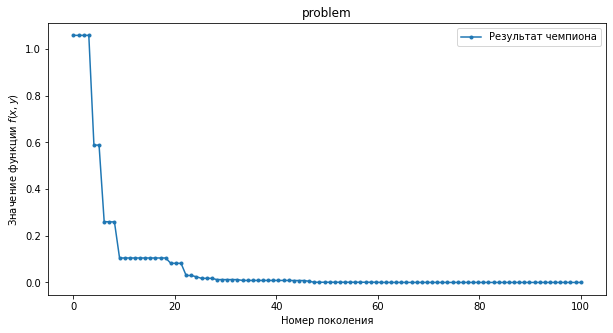

In [ ]:
fitness_list = draw_optimization(prob, alg_1)

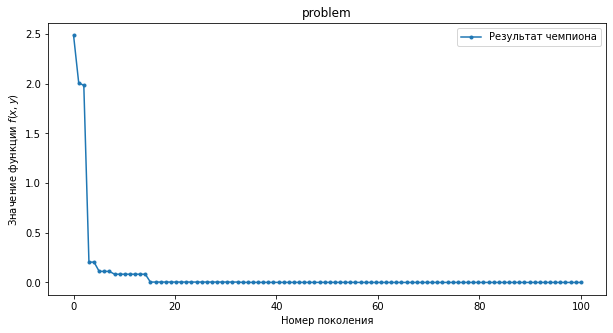

In [ ]:
fitness_list = draw_optimization(prob, alg_2)

## Для функции Изома

### Переопределим alg_1 для функции Изома

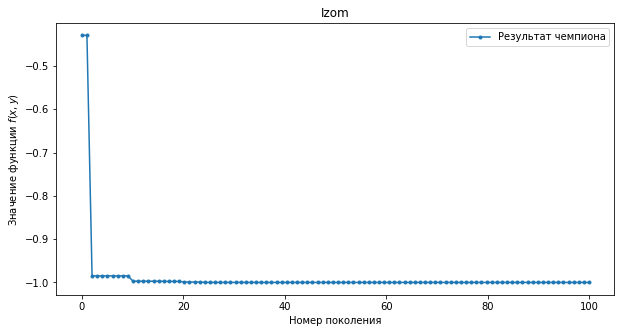

In [ ]:
fitness = draw_optimization(Izom(), alg_1)

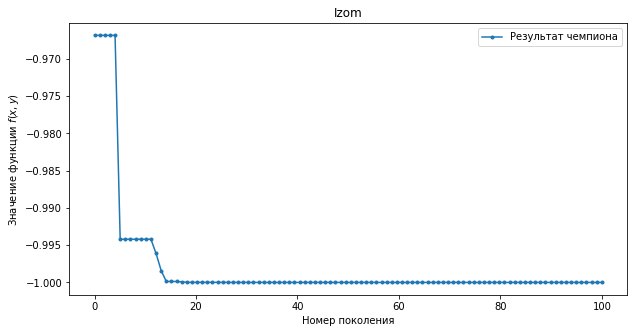

In [ ]:
fitness = draw_optimization(Izom(), alg_2)

## Решение нефункциональной задачи

### Опредяем изображение для оптимизации

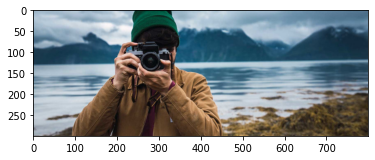

In [ ]:
img = cv2.imread('nature.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

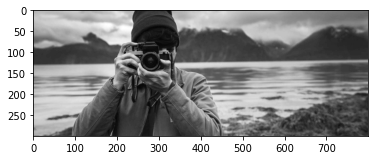

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")

### Определяем класс изображения

In [ ]:
class Image:
    def __init__(self, img):
        self.img = img
        
    def fitness(self, x):
        return [self.img[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0, 0], [self.img.shape[0] - 1, self.img.shape[1]-1])

    def get_min(self):
        return np.array([1, 1, np.amin(img)])

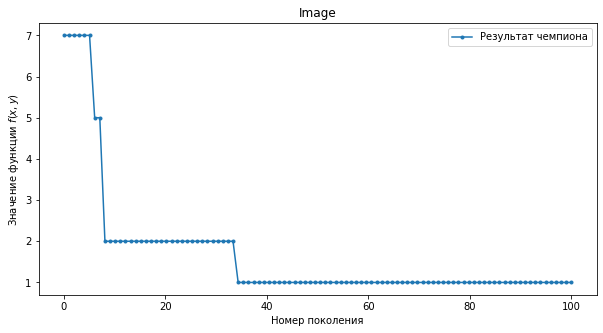

In [ ]:
fitness_list = draw_optimization(Image(img), pg.algorithm(pg.sade(1)))

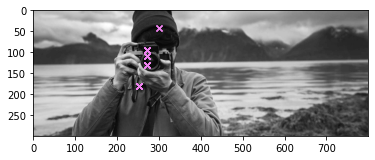

In [ ]:
best_x = [ind[1] for ind in fitness_list]
best_y = [ind[0] for ind in fitness_list]


plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.scatter(best_x,best_y, marker='x', color="violet")
plt.imshow(img, cmap="gray")

plt.show()